In [7]:
%store -r df
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
#splitting the dataFrame into x and y
x = df.drop(columns=['target'])
y = df['target']
#applying the pca on x (features)
pca = PCA()
X_pca = pca.fit_transform(x)
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
# Determine optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(cumulative_var >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

Optimal number of components to retain 95% variance: 14


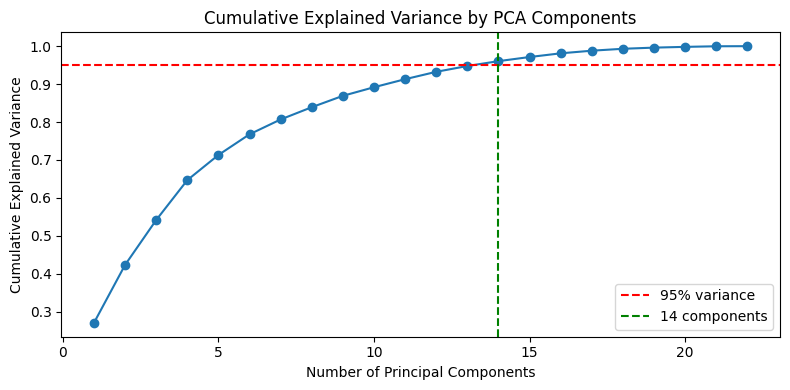

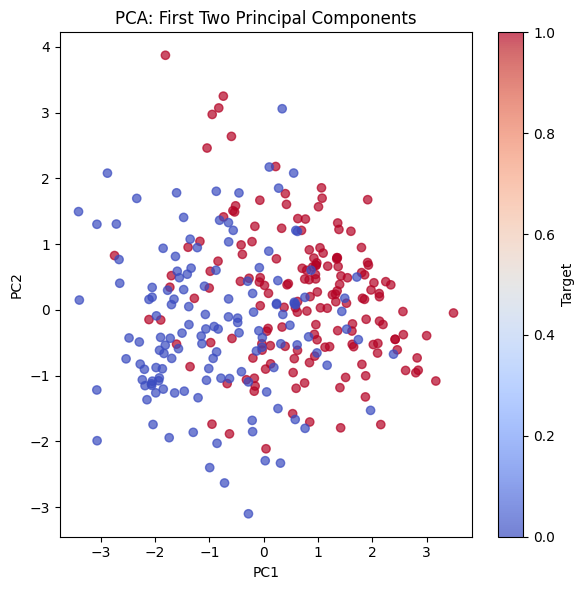

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8,4))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot of first two principal components
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['target'], cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Target')
plt.tight_layout()
plt.show()

In [11]:
# Join X_pca and y into a single DataFrame
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['target'] = y.values
display(df_pca)

# Store for use in other files
%store df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,target
0,-1.275340,0.175521,0.981650,0.123349,0.807454,0.133811,-0.039078,-0.553397,-0.280581,-0.538433,...,-0.361699,-0.638670,0.906177,-0.635008,0.015873,-0.321221,0.033386,-0.065487,0.021940,1
1,0.981921,-0.454454,1.322786,-2.600984,1.101222,-0.790691,-0.279779,0.678519,-0.253904,0.192354,...,0.091044,0.110892,-0.023809,-0.050664,-0.170252,-0.431723,-0.044159,-0.024023,-0.013977,1
2,1.623430,-0.321667,0.938902,-0.649343,0.312562,-0.764523,-0.347668,-0.787693,0.175805,-0.121246,...,0.325434,0.134509,0.016925,-0.096544,0.108554,0.165912,-0.002333,-0.052552,0.006510,1
3,1.351112,0.288728,-0.069623,0.103735,1.055129,0.295277,-0.303045,-0.271499,0.682209,0.051085,...,0.414268,0.082094,-0.064060,-0.099729,-0.038334,0.104473,-0.019867,0.011902,-0.004937,1
4,0.418956,1.604804,-1.575048,-0.738734,0.244601,-0.133376,-0.545537,0.091228,0.587373,0.642594,...,0.075685,-0.338892,0.220829,-0.016334,-0.126295,0.062018,0.023698,-0.026349,0.005491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.911239,-0.253234,-0.233168,0.715148,-1.272174,0.147363,0.425811,0.465511,0.709898,0.160634,...,0.107900,-0.227124,0.064292,-0.113445,-0.067047,-0.034883,-0.029218,-0.013816,0.017550,0
299,0.054710,-1.248300,-0.947492,-0.998132,-0.698209,0.314143,0.217399,0.375224,0.393699,-0.612680,...,-0.658173,-0.602014,-0.145359,-0.455982,0.315617,0.017254,-0.010929,0.030887,0.003755,0
300,-2.271235,-0.824909,1.276055,0.201998,1.327221,0.597083,0.155947,0.385288,0.580444,-0.486523,...,-0.267374,0.241729,-0.399776,0.222787,-0.236448,0.186252,-0.017702,0.015834,0.003066,0
301,-0.992887,-2.399535,0.530673,1.336461,-0.593120,0.498173,0.154550,0.206865,0.189953,0.716327,...,-0.057561,-0.022141,-0.144306,0.105647,0.003727,-0.015085,-0.031820,0.001229,0.006303,0


Stored 'df_pca' (DataFrame)
